In [1]:
import os
import pandas as pd
import plotly.graph_objects as go

In [2]:
DATA_ROOT = "/Users/andrewgrowney/Data/kaggle/nfl-big-data-bowl-2025"

In [3]:
TRACKING_WEEK_1 = pd.read_csv(os.path.join(DATA_ROOT, "tracking_week_1.csv"))
PLAYS_DF = pd.read_csv(f"{DATA_ROOT}/plays.csv")
PLAYERS_DF = pd.read_csv(f"{DATA_ROOT}/players.csv")
GAMES_DF = pd.read_csv(f"{DATA_ROOT}/games.csv")

<Axes: xlabel='pff_passCoverage,pff_manZone'>

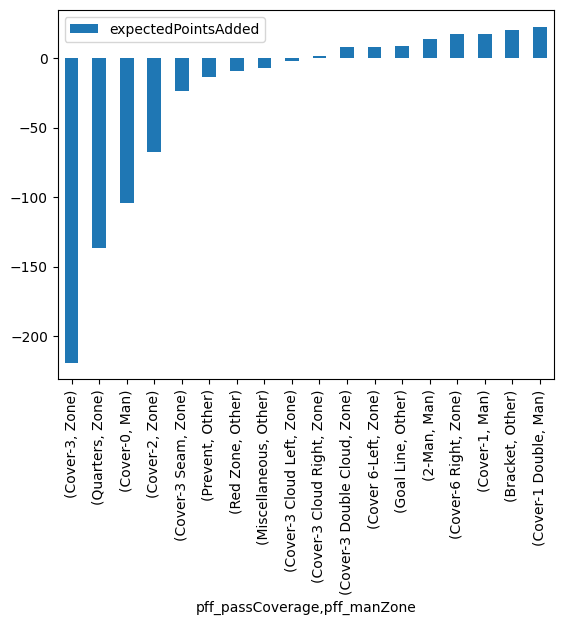

In [4]:
PLAYS_DF.groupby(["pff_passCoverage", "pff_manZone"]).agg({
    "expectedPointsAdded": "sum"
}).sort_values(by="expectedPointsAdded").plot(kind="bar")

In [5]:
def visualize_player_diff_vectors(tracking_df, game_id, play_id, start_frame_id, end_frame_id) -> go.Figure:
    """Plot the player's motion vectors on the field for a given play
    """
    motion_df = extract_player_motion_vectors(tracking_df, game_id, play_id, start_frame_id, end_frame_id)
    scale = 10

    layout = go.Layout(
        autosize=False,
        width=120*scale,
        height=60*scale,
        xaxis=dict(range=[0, 120], autorange=False, tickmode='array',tickvals=np.arange(10, 111, 5).tolist(),showticklabels=False),
        yaxis=dict(range=[0, 53.3], autorange=False,showgrid=False,showticklabels=False),
        plot_bgcolor='#00B140',
        title=f"({game_id}, {play_id})",
        updatemenus=None,
        sliders = None
    )

    annotations, data = [], []
    for _, player_df in motion_df.groupby("nflId"):
        
        player_name = player_df["displayName"].iloc[0]
        data.append(go.Scatter(x=player_df["x"], y=player_df["y"],
                               mode="lines", name=player_name
                               ))
        # Add an arrow annotation at their last x,y coordinate pointing in their direction 'dir'
        last_frame = player_df.sort_values(by="frameId").iloc[-1]
        print(player_name, last_frame[["x", "y", "s", "dir"]])

    layout["annotations"] = annotations

    
    fig = go.Figure(data=data, layout=layout)
    return fig

In [ ]:
visualize_player_diff_vectors(

In [6]:
team_defense_tendencies = PLAYS_DF[["playId", "gameId", "defensiveTeam", "pff_passCoverage", "pff_manZone"]].groupby(["pff_passCoverage", "pff_manZone", "defensiveTeam"]).agg({"defensiveTeam": "count"}).rename({"defensiveTeam": "timesCalled"},axis=1).reset_index().set_index(["pff_passCoverage", "pff_manZone"])

In [8]:
# Initialize figure
fig = go.Figure()

# Create traces and steps for each index
for level1 in team_defense_tendencies.index.get_level_values(0).unique():
    filtered_df = team_defense_tendencies.xs(level1, level=0)
    print(filtered_df.index)
    
    trace = go.Scatter(
        x=team_defense_tendencies.index.get_level_values(1),
        y=filtered_df['Value'],
        mode='lines+markers',
        name=str(level1)
    )
    fig.add_trace(trace)

# Create steps for the slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
        label=fig.data[i].name
    )
    step["args"][1][i] = True  # Toggle i-th trace to be visible
    steps.append(step)

# Create slider
sliders = [dict(
    active=0,
    steps=steps
)]

# Update layout with slider
fig.update_layout(
    sliders=sliders,
    title="Slider to Flip Through Subplots for Each Index",
    xaxis_title="Level2",
    yaxis_title="Value"
)

fig.show()


Index(['Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man',
       'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man', 'Man'],
      dtype='object', name='pff_manZone')


KeyError: 'Value'